<a href="https://colab.research.google.com/github/arthurvaz05/Python.Script/blob/master/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install gmplot

In [0]:
pip install credentials

In [0]:
from textblob import TextBlob as tb
import tweepy
import numpy as np
from geopy.geocoders import Nominatim
import gmplot
import credentials
import json
import pandas as pd

In [0]:
geolocator = Nominatim(user_agent="my-application")

In [0]:
consumer_key = 'FLXkbCzDqtlYrZfxtkY7HH5Vh'
consumer_secret = 'aCknCkXsnYRpyv8ZiYhsBC7kzJZ05PlaTTiPrVB2J7nEGAZeTD'
access_token = '426085292-8629TERixXEA0obWMaVlepeAJi6tBLT6gGuQp0gv'
access_token_secret = 'Sewun3VXeTf6sR2NGgNncb7PKI5jef5AodnIJ3szXfhKK'

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [0]:
searchString = "bolsonaro"

cursor = tweepy.Cursor(api.search, q=searchString, lang="pt",
                       tweet_mode='extended',geocode="-22.9035,-43.2096,5km")#,since="2019-09-10",until="2019-12-01")

In [0]:
for tweet in cursor.items(): 
  try:
     print(tweet.geo['coordinates'])
  except:
        pass

[-22.91241921, -43.18344807]
[-22.908, -43.1975]
[-22.8843089, -43.2640802]
[-22.908, -43.1975]


In [0]:
# Go through all tweets and add locations to 'coordinates' dictionary
coordinates_save = {'latitude': [], 'longitude': []}
for tweets in cursor.items():
  try:
    coordinates_save['latitude'].append(tweets.geo['coordinates'][0])
    coordinates_save['longitude'].append(tweets.geo['coordinates'][1])
  except:
    pass      

In [0]:
# Instantiate and center a GoogleMapPlotter object to show our map
gmap = gmplot.GoogleMapPlotter(-22.9035,-43.2096, 12)

# Insert points on the map passing a list of latitudes and longitudes
gmap.heatmap(coordinates_save['latitude'], coordinates_save['longitude'], radius=20)

# Save the map to html file
gmap.draw("python_heatmap.html")

In [0]:
search_terms = ['Vasco', 'Flamengo']
def stream_tweets(search_term):
    data = [] # empty list to which tweet_details obj will be added
    counter = 0 # counter to keep track of each iteration
    #____q=’\”{}\” -filter:retweets’.format(search_term): This ensures that the tweets returned 
    #contain the exact search phrase and that retweets are not returned in the results as it can result 
    #in duplicate data.
    for tweet in tweepy.Cursor(api.search, q='\"{}\" -filter:retweets'.format(search_term), count=100, lang='en', 
                               tweet_mode='extended').items():
        tweet_details = {}
        tweet_details['name'] = tweet.user.screen_name
        tweet_details['tweet'] = tweet.full_text
        tweet_details['retweets'] = tweet.retweet_count
        tweet_details['location'] = tweet.user.location
        tweet_details['created'] = tweet.created_at.strftime("%d-%b-%Y")
        tweet_details['followers'] = tweet.user.followers_count
        tweet_details['is_user_verified'] = tweet.user.verified
        data.append(tweet_details)
        
        counter += 1
        if counter == 1000:
            break
        else:
            pass

In [0]:
time = []
for search_term in search_terms:
        try:
          time = time.append(stream_tweets(search_term))
        except:
          pass

In [0]:
# O Yahoo! Where On Earth ID para o Brasil é 23424768.
# Veja mais em https://dev.twitter.com/docs/api/1.1/get/trends/place e http://developer.yahoo.com/geo/geoplanet/
BRAZIL_WOE_ID = 23424768
 
brazil_trends = api.trends_place(BRAZIL_WOE_ID)

In [0]:
trends = json.loads(json.dumps(brazil_trends, indent=1))
 
for trend in trends[0]["trends"]:
	print ((trend["name"]).strip("#"))

portugacareca
Pain
oioioi46
ancap
SMWheresTheObsessionNumbers
ondedoi
JTBC
Zidane e Ronaldinho
Globo de Ouro
Yudi
Gustavo Gomez
Marcelo Segurado
Força Nacional
Cirilo
Meninos da Árvore
Ozil
Sormani
CBLOL 2020
EM DOZE MESES DO ANO VC JÁ
Mylon
Rogério Marinho
Robinson de Castro
Bengals
OT6 NÃO É ARMY
TV Escola
O Jorginho
BolaDePrataESPN
prayforpintoawards
opaivoltou
FalaMuito
fsradiobrasil
TaylorWins10s
BanKpopAccounts
RenunciaDiretoriaCruzeiro
silviosantosracista
bbdebate
mtvhitscomoex
FofocalizandoNoSBT
MeuCoracaoETeu026
graffite98
tarderedonda
sejoga
KeepMonstaXAs7
surfenaespn
bolarolando
WHUARS
TodaFormaDeAmar
selecaosportv
CaminhosDoCoração183
estudioi


In [0]:
#Variável que irá armazenar todos os Tweets com a palavra escolhida na função search da API
public_tweets = api.search('\"{}\" -filter:retweets'.format('Vasco'),tweet_mode='extended',count = 100, lang = 'pt')

In [0]:
tweets = [] # Lista vazia para armazenar scores
criacao = []
texto = []
retweet = []
coordenadas = []
user_nome = []
user_apelido = []
user_contas_favoritas = []
user_contas_seguidores = []
user_contas_amigos = []
user_contas_status_twitter = []

for tweet in public_tweets:
  criacao.append(tweet._json['created_at'])
  texto.append(tweet._json['full_text'])
  retweet.append(tweet._json['retweet_count'])
  coordenadas.append(tweet._json['coordinates'])
  user_nome.append(tweet._json['user']['name'])
  user_apelido.append(tweet._json['user']['screen_name'])
  user_contas_favoritas.append(tweet._json['user']['favourites_count'])
  user_contas_seguidores.append(tweet._json['user']['followers_count'])
  user_contas_amigos.append(tweet._json['user']['friends_count'])
  user_contas_status_twitter.append(tweet._json['user']['statuses_count'])

In [0]:
data = {'criacao': criacao,'texto': texto,'retweet':retweet,'coordenadas':coordenadas,
        'user_nome':user_nome,'user_apelido':user_apelido,
        'user_contas_favoritas':user_contas_favoritas, 'user_contas_seguidores':user_contas_seguidores,
        'user_contas_amigos':user_contas_amigos, 'user_contas_status_twitter':user_contas_status_twitter}

In [0]:
twitter_df = pd.DataFrame(data)

In [0]:
" ".join(filter(lambda x:x[0]!='@', twitter_df.texto[0].split()))

'SUDERJ INFORMA: Sai - Estátua do Romário Entra - Estátua da liberdade 😛 Via Alexandre Vieira https://t.co/IdoL8e36xR'

In [0]:
def tirar_id(y):
  z = " ".join(filter(lambda x:x[0]!='@', y.split()))
  return z

In [0]:
twitter_df.texto = twitter_df.texto.map(tirar_id)

In [0]:
twitter_df.head(5)

,criacao,texto,retweet,coordenadas,user_nome,user_apelido,user_contas_favoritas,user_contas_seguidores,user_contas_amigos,user_contas_status_twitter
0,Mon Dec 09 21:16:19 +0000 2019,SUDERJ INFORMA: Sai - Estátua do Romário Entra...,0,None,Fabi Cristina,Fabicristtina,11,132,183,14745
1,Mon Dec 09 21:16:18 +0000 2019,Traz o Salah pro vasco,0,None,DanielCRVG ✠,danielferraroa1,539,24,178,56
2,Mon Dec 09 21:16:13 +0000 2019,"Pode não ser, mas tu entendeu muito bem o que ...",0,None,"zabuza momochi, o demônio do gás oculto",bhadzin,4960,187,445,8984
3,Mon Dec 09 21:16:12 +0000 2019,Geral comprou meia do Vasco ontem eu não vi ni...,0,None,Caique Guarin 🍥,Caiique1995,42874,566,1060,19260
4,Mon Dec 09 21:16:10 +0000 2019,"A partir de 13:15: ""Os críticos em geral acred...",0,None,Galo Vasco,galo_vasco,158818,2438,2593,129310


In [0]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
twitter_word = twitter_df.texto.map(word_tokenize)

In [0]:
#twitter_word

In [0]:
myString = ''
for x in twitter_word:
    myString += ",".join(x)
#print(myString)

In [0]:
twitter_word = word_tokenize(myString)

In [0]:
twitter_word = [x for x in twitter_word if x not in stopwords]

In [0]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 

In [0]:
comment_words = ' '
#stopwords = set(stopwords) 
  
# iterate through the csv file 
for val in twitter_df.texto: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      if words not in stopwords:
        comment_words = comment_words + words + ' '

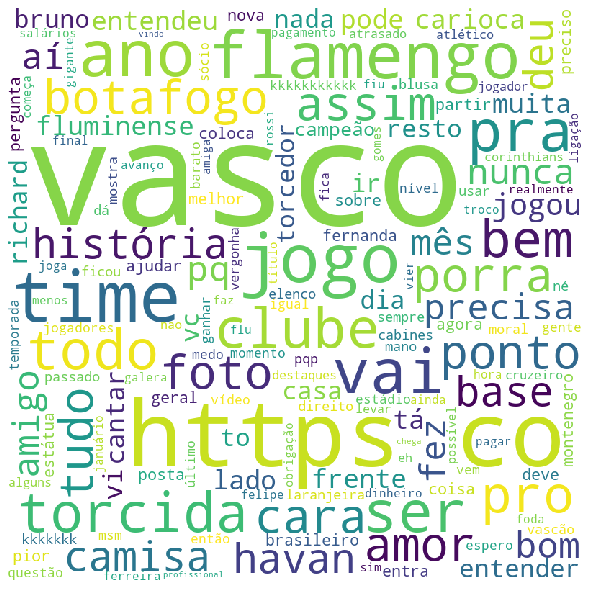

In [0]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
palavras = ['ser', 'todo','pode','entra','tudo','deu','entender','precisa','deve',
            'vc','né','https','msm','vcs','pq']
for palavra in palavras:
  stopwords.append(palavra)

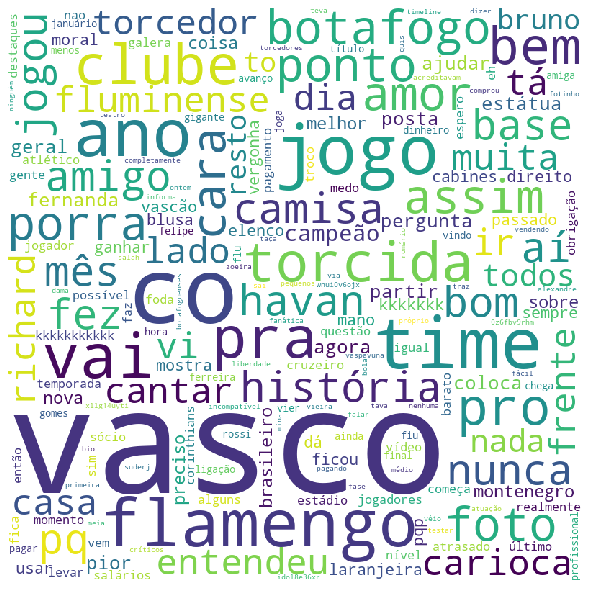

In [0]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 